<a href="https://colab.research.google.com/github/gangasani-anusha/DataMining_assignments/blob/main/Netflix_Dataset_DataCleaning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing All required**

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import sklearn as sk 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## **Importing Dataset**

If a dataset is located in Google Drive initially we need to mount the "gdrive"

In [297]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [298]:
#Fetch the dataset from the location
netflix_data_set=pd.read_csv('gdrive/My Drive/Colab Notebooks/netflix_titles.csv', encoding='utf-8')
netflix_data_set.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Data Cleaning & Preprocessing**



In [299]:
#Iterating through all columns in dataframe and printing count of null values
for column in netflix_data_set:
    null_count=netflix_data_set[column].isnull().sum()
    print('Null Values in ',column,' is ',null_count)

Null Values in  show_id  is  0
Null Values in  type  is  0
Null Values in  title  is  0
Null Values in  director  is  2634
Null Values in  cast  is  825
Null Values in  country  is  831
Null Values in  date_added  is  10
Null Values in  release_year  is  0
Null Values in  rating  is  4
Null Values in  duration  is  3
Null Values in  listed_in  is  0
Null Values in  description  is  0


In [300]:
#Iterating through all columns in dataframe and printing datatype of columns
for column in netflix_data_set:
    print('Data types Values in ',column,' is ',type(netflix_data_set[column][0]))

Data types Values in  show_id  is  <class 'str'>
Data types Values in  type  is  <class 'str'>
Data types Values in  title  is  <class 'str'>
Data types Values in  director  is  <class 'str'>
Data types Values in  cast  is  <class 'float'>
Data types Values in  country  is  <class 'str'>
Data types Values in  date_added  is  <class 'str'>
Data types Values in  release_year  is  <class 'numpy.int64'>
Data types Values in  rating  is  <class 'str'>
Data types Values in  duration  is  <class 'str'>
Data types Values in  listed_in  is  <class 'str'>
Data types Values in  description  is  <class 'str'>


**Handling the NULL values**

In [301]:
#Replacing the null values of the columns director, cast with Other Director and Other Cast respectively
netflix_data_set['director'].replace(np.nan,'Other Director',inplace=True)
netflix_data_set['cast'].replace(np.nan,'Other Cast',inplace=True)

#Columns country, date_added, rating and duration can be easily filled without changing the basic statistics
netflix_data_set['country'] = netflix_data_set['country'].fillna(netflix_data_set['country'].mode()[0])
netflix_data_set["date_added"].fillna( method ='ffill', inplace = True)
netflix_data_set["rating"].fillna( method ='ffill', inplace = True)
netflix_data_set["duration"].fillna( method ='ffill', inplace = True)

#Checking for the null values after data cleaning
for column in netflix_data_set:
    null_count=netflix_data_set[column].isnull().sum()
    print('Null Values in ',column,' is ',null_count)

Null Values in  show_id  is  0
Null Values in  type  is  0
Null Values in  title  is  0
Null Values in  director  is  0
Null Values in  cast  is  0
Null Values in  country  is  0
Null Values in  date_added  is  0
Null Values in  release_year  is  0
Null Values in  rating  is  0
Null Values in  duration  is  0
Null Values in  listed_in  is  0
Null Values in  description  is  0


**Feature Engineering**

In [302]:
#Separting the values present in duration column into season_count and durations columns
netflix_data_set['season_count'] = netflix_data_set.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix_data_set['duration'] = netflix_data_set.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
netflix_data_set.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Other Cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",
1,s2,TV Show,Blood & Water,Other Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,Other Director,Other Cast,United States,"September 24, 2021",2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,Other Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2


In [303]:
#Adding new Features i.e, year_added, month_added from the date_added column 
netflix_data_set["date_added"] = pd.to_datetime(netflix_data_set['date_added'])
netflix_data_set['year_added'] = netflix_data_set['date_added'].dt.year
netflix_data_set['month_added'] = netflix_data_set['date_added'].dt.month


In [304]:
#Converting the string datatypes of the columns into a numeric
netflix_data_set['duration'] = pd.to_numeric(netflix_data_set['duration'])
netflix_data_set['year_added'] = pd.to_numeric(netflix_data_set['year_added'])
netflix_data_set['month_added'] = pd.to_numeric(netflix_data_set['month_added'])
netflix_data_set['season_count'] = pd.to_numeric(netflix_data_set['season_count'])

#Checking for the Data types after data cleaning
for column in netflix_data_set:
    print('Data Type of ',column,' is ',type(netflix_data_set[column][0]))

Data Type of  show_id  is  <class 'str'>
Data Type of  type  is  <class 'str'>
Data Type of  title  is  <class 'str'>
Data Type of  director  is  <class 'str'>
Data Type of  cast  is  <class 'str'>
Data Type of  country  is  <class 'str'>
Data Type of  date_added  is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Data Type of  release_year  is  <class 'numpy.int64'>
Data Type of  rating  is  <class 'str'>
Data Type of  duration  is  <class 'numpy.float64'>
Data Type of  listed_in  is  <class 'str'>
Data Type of  description  is  <class 'str'>
Data Type of  season_count  is  <class 'numpy.float64'>
Data Type of  year_added  is  <class 'numpy.int64'>
Data Type of  month_added  is  <class 'numpy.int64'>


**Outlier Analysis**

In [305]:
netflix_data_set

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Other Cast,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",NaN,2021,9
1,s2,TV Show,Blood & Water,Other Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2021,9
3,s4,TV Show,Jailbirds New Orleans,Other Director,Other Cast,United States,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2021,9
4,s5,TV Show,Kota Factory,Other Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",NaN,2019,11
8803,s8804,TV Show,Zombie Dumb,Other Director,Other Cast,United States,2019-07-01,2018,TV-Y7,NaN,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,NaN,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",NaN,2020,1


In [306]:
#displaying the data in graph format to predict the outliers
outlier_data_analysis = px.strip(netflix_data_set, x='release_year', y="type", orientation="h", color="type")
outlier_data_analysis.show()

In [307]:
#Removing the datarecords from the dataset which has releaser year less than 1980
new_netflix_data_set = netflix_data_set[~(netflix_data_set.release_year<1980)]
new_netflix_data_set

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Other Cast,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",NaN,2021,9
1,s2,TV Show,Blood & Water,Other Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2021,9
3,s4,TV Show,Jailbirds New Orleans,Other Director,Other Cast,United States,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2021,9
4,s5,TV Show,Kota Factory,Other Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",NaN,2019,11
8803,s8804,TV Show,Zombie Dumb,Other Director,Other Cast,United States,2019-07-01,2018,TV-Y7,NaN,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.0,2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,NaN,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",NaN,2020,1


In [308]:
#Structure of the data
new_netflix_data_set.describe(include='O').T

,count,unique,top,freq
show_id,8685,8685,s5372,1
type,8685,2,Movie,6018
title,8685,8685,Indian Horse,1
director,8685,4456,Other Director,2624
cast,8685,7584,Other Cast,812
country,8685,741,United States,3593
rating,8685,17,TV-MA,3192
listed_in,8685,500,"Dramas, International Movies",360
description,8685,8653,"Paranormal activity at a lush, abandoned prope...",4


## **Data Visualization**

**Ratings on Netflix using Pie Chart**


In [309]:
#Displaying the rating column data percentage wise ( by caluclating the count of each rating )
data_for_piechart=pd.DataFrame( {"rating": new_netflix_data_set.rating.value_counts().index, "Counts": new_netflix_data_set.rating.value_counts().values})


diagram = px.pie(data_for_piechart, values='Counts', names='rating',title='NETFLIX RATINGS'
        ,hole=0.6 ,  color_discrete_sequence=px.colors.sequential.RdBu )
diagram.update_traces(hovertemplate=None, textposition='inside',textinfo="percent+label")

diagram.update_layout(margin=dict(t=55, b=55, l=0, r=0),plot_bgcolor='black', paper_bgcolor='white',
                  title_font=dict(size=25, color='black', family="Lato, sans-serif"),font=dict(size=15, color='#8a8d93'),
                  hoverlabel=dict(bgcolor="black", font_size=12,font_family="Lato, sans-serif")) 

diagram.show()

**Types of shows added with rating using Bar Plots**





In [310]:
#Fetch the data into 2 different datasets based on the type of show
new_data_set1 = new_netflix_data_set[new_netflix_data_set["type"] == "TV Show"]
new_data_set2 = new_netflix_data_set[new_netflix_data_set["type"] == "Movie"]
required_column = "rating"

#Counts the number of TV shows w.r.t rating and calculates the percentage
variable1 = new_data_set1[required_column].value_counts().reset_index()
variable1 = variable1.rename(columns = {required_column : "count", "index" : required_column})
variable1['percent'] = variable1['count'].apply(lambda x : 100*x/sum(variable1['count']))
variable1 = variable1.sort_values(required_column)

#Counts the number of Movies w.r.t rating and calculates the percentage
variable2 = new_data_set2[required_column].value_counts().reset_index()
variable2 = variable2.rename(columns = {required_column : "count", "index" : required_column})
variable2['percent'] = variable2['count'].apply(lambda x : 100*x/sum(variable2['count']))
variable2 = variable2.sort_values(required_column)

#Displaying the Bar plots based on the data obtained
tv_shows_data = go.Bar(x=variable1[required_column], y=variable1["count"], name="TV Shows", marker=dict(color="yellow"))
movies_data = go.Bar(x=variable2[required_column], y=variable2["count"], name="Movies", marker=dict(color="black"))
new_data_set = [tv_shows_data, movies_data]
layout = go.Layout(title="TV shows/Movies added w.r.t Rating", legend=dict(x=0.1, y=1.1, orientation="h"))
diagram = go.Figure(new_data_set, layout=layout)
diagram.show()



**Shows added over the years using Scatter Plots**

In [311]:
#Fetch the data into 2 different datasets based on the type of show
new_data_set1 = new_netflix_data_set[new_netflix_data_set["type"] == "TV Show"]
new_data_set2 = new_netflix_data_set[new_netflix_data_set["type"] == "Movie"]
required_column = "year_added"

#Counts the number of TV shows w.r.t year_added column data and calculates the percentage
variable1 = new_data_set1[required_column].value_counts().reset_index()
variable1 = variable1.rename(columns = {required_column : "count", "index" : required_column})
variable1['percent'] = variable1['count'].apply(lambda x : 100*x/sum(variable1['count']))
variable1 = variable1.sort_values(required_column)

#Counts the number of Movies w.r.t year_added column data and calculates the percentage
variable2 = new_data_set2[required_column].value_counts().reset_index()
variable2 = variable2.rename(columns = {required_column : "count", "index" : required_column})
variable2['percent'] = variable2['count'].apply(lambda x : 100*x/sum(variable2['count']))
variable2 = variable2.sort_values(required_column)

#Displaying the Scatter plots based on the data obtained
tv_shows_data = go.Scatter(x=variable1[required_column], y=variable1["count"], name="TV Shows", marker=dict(color="black"))
movies_data = go.Scatter(x=variable2[required_column], y=variable2["count"], name="Movies", marker=dict(color="yellow"))
new_data_set = [tv_shows_data, movies_data]
layout = go.Layout(title="Shows added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
diagram = go.Figure(new_data_set, layout=layout)
diagram.show()

Feature Engineering 

In [312]:
#Removing the unnecessary data
new_netflix_data1 = new_netflix_data_set.drop(['description'],axis='columns')
new_netflix_data1.shape

(8685, 14)

Types of Rating

In [313]:
#Displaying the various kinds of rating in the dataset
new_netflix_data1['rating'] = new_netflix_data1['rating'].replace({'TV-PG': 'Kids','TV-MA': 'Adults','TV-Y7-FV':'Kids','TV-Y7': 'Kids','TV-14': 'Teens','R': 'Adults',
                                         'TV-Y': 'Kids','NR': 'Adults','PG-13': 'Teens', 'TV-G': 'Kids', 
                                         'PG': 'Kids', 'G': 'Kids','UR': 'Adults',
                                         'NC-17': 'Adults'})
new_netflix_data1.rating.value_counts()

Adults    4061
Teens     2612
Kids      2009
74 min       1
84 min       1
66 min       1
Name: rating, dtype: int64

**Frequency of Shows using Bar plots**

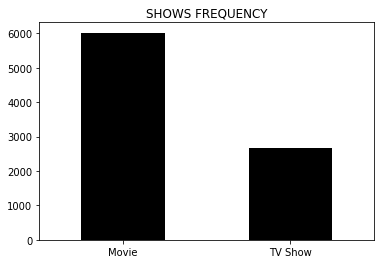

In [314]:
#Displays the number of Movies and TV shows
data_set = new_netflix_data1.type.value_counts()
data_set.plot.bar(color  ="black")
plt.xticks(rotation = 0)
plt.title("SHOWS FREQUENCY")
plt.show()

**Number of Shows released in 10 Countries**

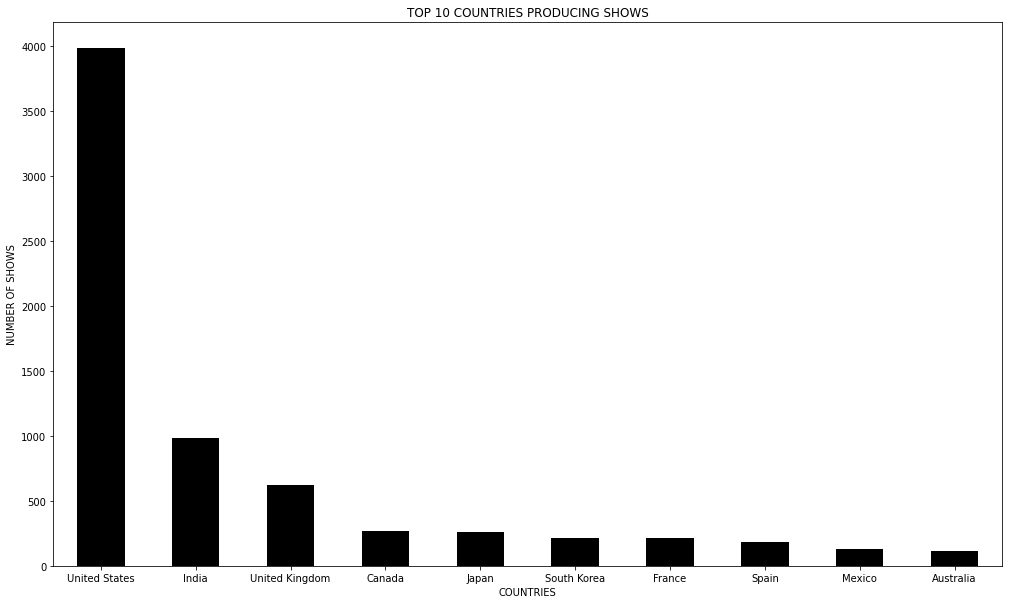

In [315]:
#Displays the number of shows produced in top 10 countries 
new_netflix_data1['country'] = new_netflix_data1['country'].apply(lambda x: x.split(",")[0])
country_count = new_netflix_data1.country.value_counts().head(10)
plt.figure(figsize = (17, 10) )
country_count.plot.bar(color = 'black' )
plt.xticks(rotation = 0)
plt.xlabel("COUNTRIES")
plt.ylabel("NUMBER OF SHOWS")
plt.title("TOP 10 COUNTRIES PRODUCING SHOWS")
plt.show()

**Shows an thier released years using Strip**

In [316]:
#Displays the shows in which year it is released
fig = px.strip(new_netflix_data1, x='release_year', y="type", orientation="h", color="type")
fig.show()

Genres of Shows



In [317]:
#Displays the number of shows w.r.t genre
new_netflix_data1['genre'] = new_netflix_data1['listed_in'].apply(lambda x: x.split(",")[0] )
plt.figure(figsize= (10 ,8))
genre = new_netflix_data1.genre.value_counts() 
genre

Dramas                          1589
Comedies                        1201
Action & Adventure               829
Documentaries                    823
International TV Shows           773
Children & Family Movies         599
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  333
Horror Movies                    275
British TV Shows                 251
Docuseries                       221
Anime Series                     176
International Movies             127
Reality TV                       120
TV Comedies                      120
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Classic Movies                    33
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 19
Music & Musicals                  18
S

<Figure size 720x576 with 0 Axes>

**Top 10 Actors in Shows using Bar plot**

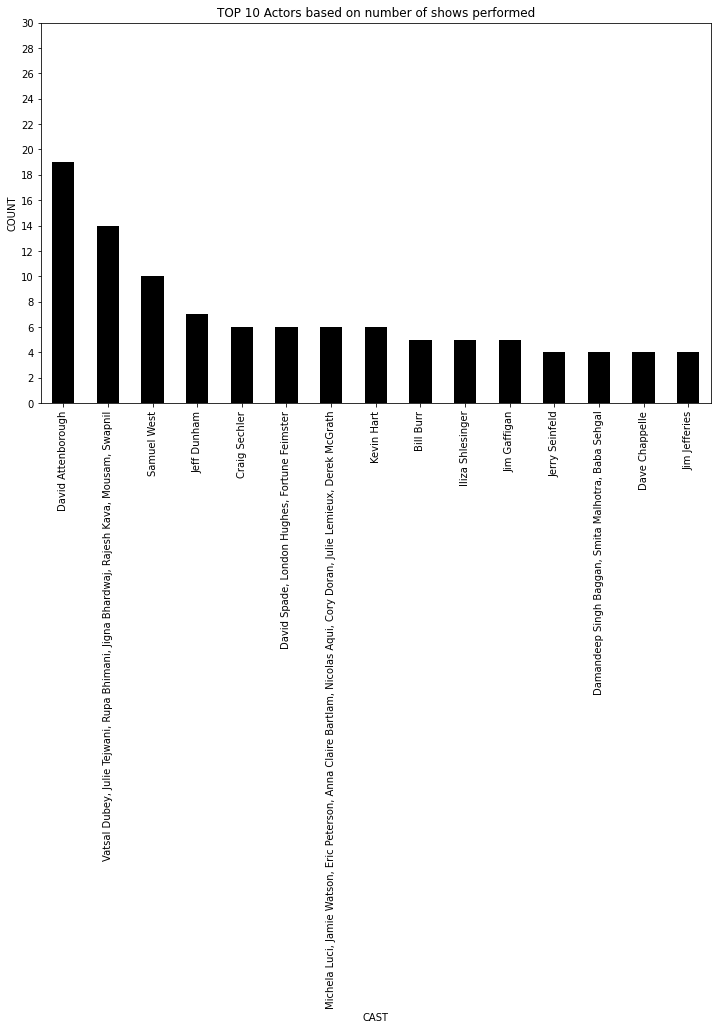

In [318]:
#Displays the 10 actors who have performed in maximum number of shows
cast_data = new_netflix_data1.cast.value_counts()[1:16]
cast_data.plot(kind='bar',figsize=(12,7), title= "TOP 10 Actors based on number of shows performed" , color = 'black')
plt.ylabel("COUNT")
plt.xlabel("CAST")
plt.yticks([int(n) for n in range(0,32,2)] )
plt.show()


**Pairplot of the Shows**

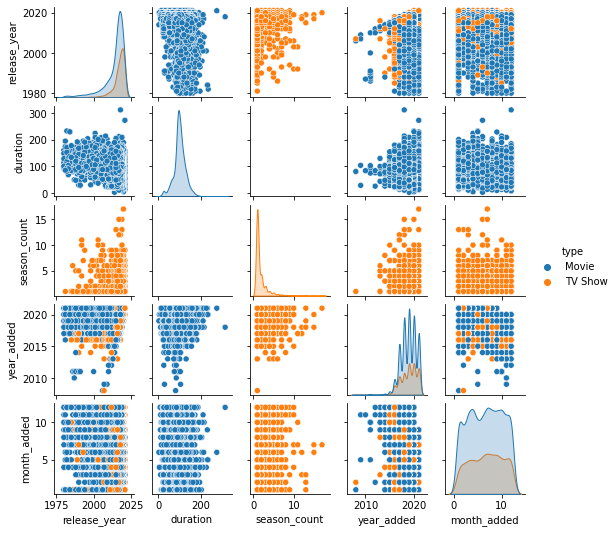

In [319]:
#Displays the type of shows based on attributes in the dataset
sns.pairplot(new_netflix_data1, hue='type', height=1.5);

# **Model Training**

### **Scikit-Learn with Linear Regression**

Class of Model

In [320]:
#To compute a linear regression we need to import the linear regression class
from sklearn.linear_model import LinearRegression

Model Instantiate



In [321]:
#Model is instantiated for storing values
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Adding Data to Matrix

In [322]:
#Arranging the data into matrix with release_year column
release_year_data = new_netflix_data1.release_year[:, np.newaxis]
release_year_data.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



(8685, 1)

In [323]:
#Arranging the data into matrix with year_added column
year_added_data = new_netflix_data1.year_added[:, np.newaxis]
year_added_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



(8685, 1)

Applying Model to data

In [324]:
model.fit(release_year_data, year_added_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Slope of the Data

In [325]:
model.coef_

array([[0.03188142]])

Intercept of the Data

In [326]:
model.intercept_

array([1954.63572353])

Prediction of unknown data

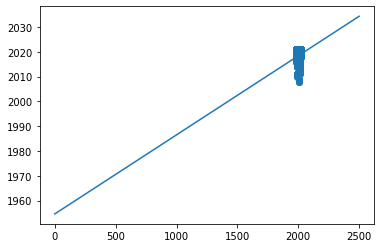

In [327]:
#Efficiency of the model is evaluated by comparing its results to a baseline
xfit_data = np.linspace(-1, 2500)
X_axis_data = xfit_data[:, np.newaxis]
Y_axis_data = model.predict(X_axis_data)
plt.scatter(release_year_data, year_added_data)
plt.plot(X_axis_data, Y_axis_data);

## **Scikit-Learn Classification with Gaussian naive Bayes model:**

Extraction of matrix

In [328]:
#We extract the features matrix and transfer to a target array 
release_year_data = new_netflix_data1.release_year[:, np.newaxis]
release_year_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



(8685, 1)

In [329]:
#We extract the features matrix and transfer to a target array 
year_added_data = new_netflix_data1.year_added[:, np.newaxis]
year_added_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



(8685, 1)

Separation of data


In [330]:
#We will split the data into a training and testing set w.r.t random_state
Xtrain, Xtest, ytrain, ytest = train_test_split(X_release_year, Y_year_added, random_state=1)

In [331]:
#We will split the data into a training and testing set w.r.t random_state
Xtrain, Xtest, ytrain, ytest = train_test_split(release_year_data, year_added_data, random_state=0)

Application of Gaussian navie Bayels model

In [332]:
#Prediction of Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model_data = model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Calculating the Accuracy 

In [333]:
#Testing the accuaracy of the model
accuracy_score(ytest, y_model_data)

0.25828729281767954

Implementation of Confusion Matrix

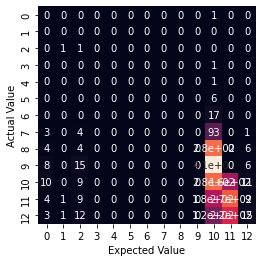

In [334]:
#Application of confusion matrix to compute the scikit-learn and plot seaborn
mat = confusion_matrix(ytest, y_model_data)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Expected Value')
plt.ylabel('Actual Value');

## **Cosine Similarity**

Defining Count Vectorizer and Constructing a matrix

In [335]:
#Define a Count Vectorizer Object which removes all english stop words such as 'the', 'a'
count_data = CountVectorizer(stop_words='english')

#Construct the required matrix by fitting and transforming the data
count_matrix = count_data.fit_transform(new_netflix_data_set['director'])
count_matrix.shape

#Define a Vectorizer Object which removes all english stop words such as 'the', 'a'
tfidf_data = TfidfVectorizer(stop_words='english')

#Construct the required matrix by fitting and transforming the data
new_matrix = tfidf_data.fit_transform(new_netflix_data_set['listed_in'])

Extraction the cosinie similarity matrix

In [336]:
# Compute the cosine similarity matrix
cosine_similarity_data2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim = linear_kernel(new_matrix, new_matrix)
cosine_sim.shape

(8685, 8685)

Defining a function to get recommendations with similar values

In [337]:
# Function that takes in movie title as input and outputs most similar movies
def get_similar_shows(title, cosine_sim=cosine_sim):
    title_id = indices[title]
    similarity_score = list(enumerate(cosine_sim[title_id]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    similarity_score = similarity_score[1:10]
    show_indices = [i[0] for i in similarity_score]
    return new_netflix_data_set['title'].iloc[show_indices]

Reset ID's of Dataset

In [338]:
# Reset index of your main Dataset and construct reverse mapping as before
new_netflix_data_set = new_netflix_data_set.reset_index(drop=True)
indices = pd.Series(new_netflix_data_set.index, index=new_netflix_data_set['title'])

Displaying similar data

In [339]:
#To get recommendations for a similar movie/series title using this model.
get_similar_shows("Love", cosine_similarity_data2)

2427                    Chippa
4126           Hantu Kak Limah
4697                      Fiza
6223         Because of Soccer
3103    Sincerely Yours, Dhaka
0         Dick Johnson Is Dead
1                Blood & Water
2                    Ganglands
3        Jailbirds New Orleans
Name: title, dtype: object